In [110]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [111]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [112]:
fetch_housing_data()


In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
# Saves the data in housing
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Shows basic infrmation about the data
housing.info()
# there is missing data for total bedrooms and ocean_proximity is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# showing the categories of ocean_proximity
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


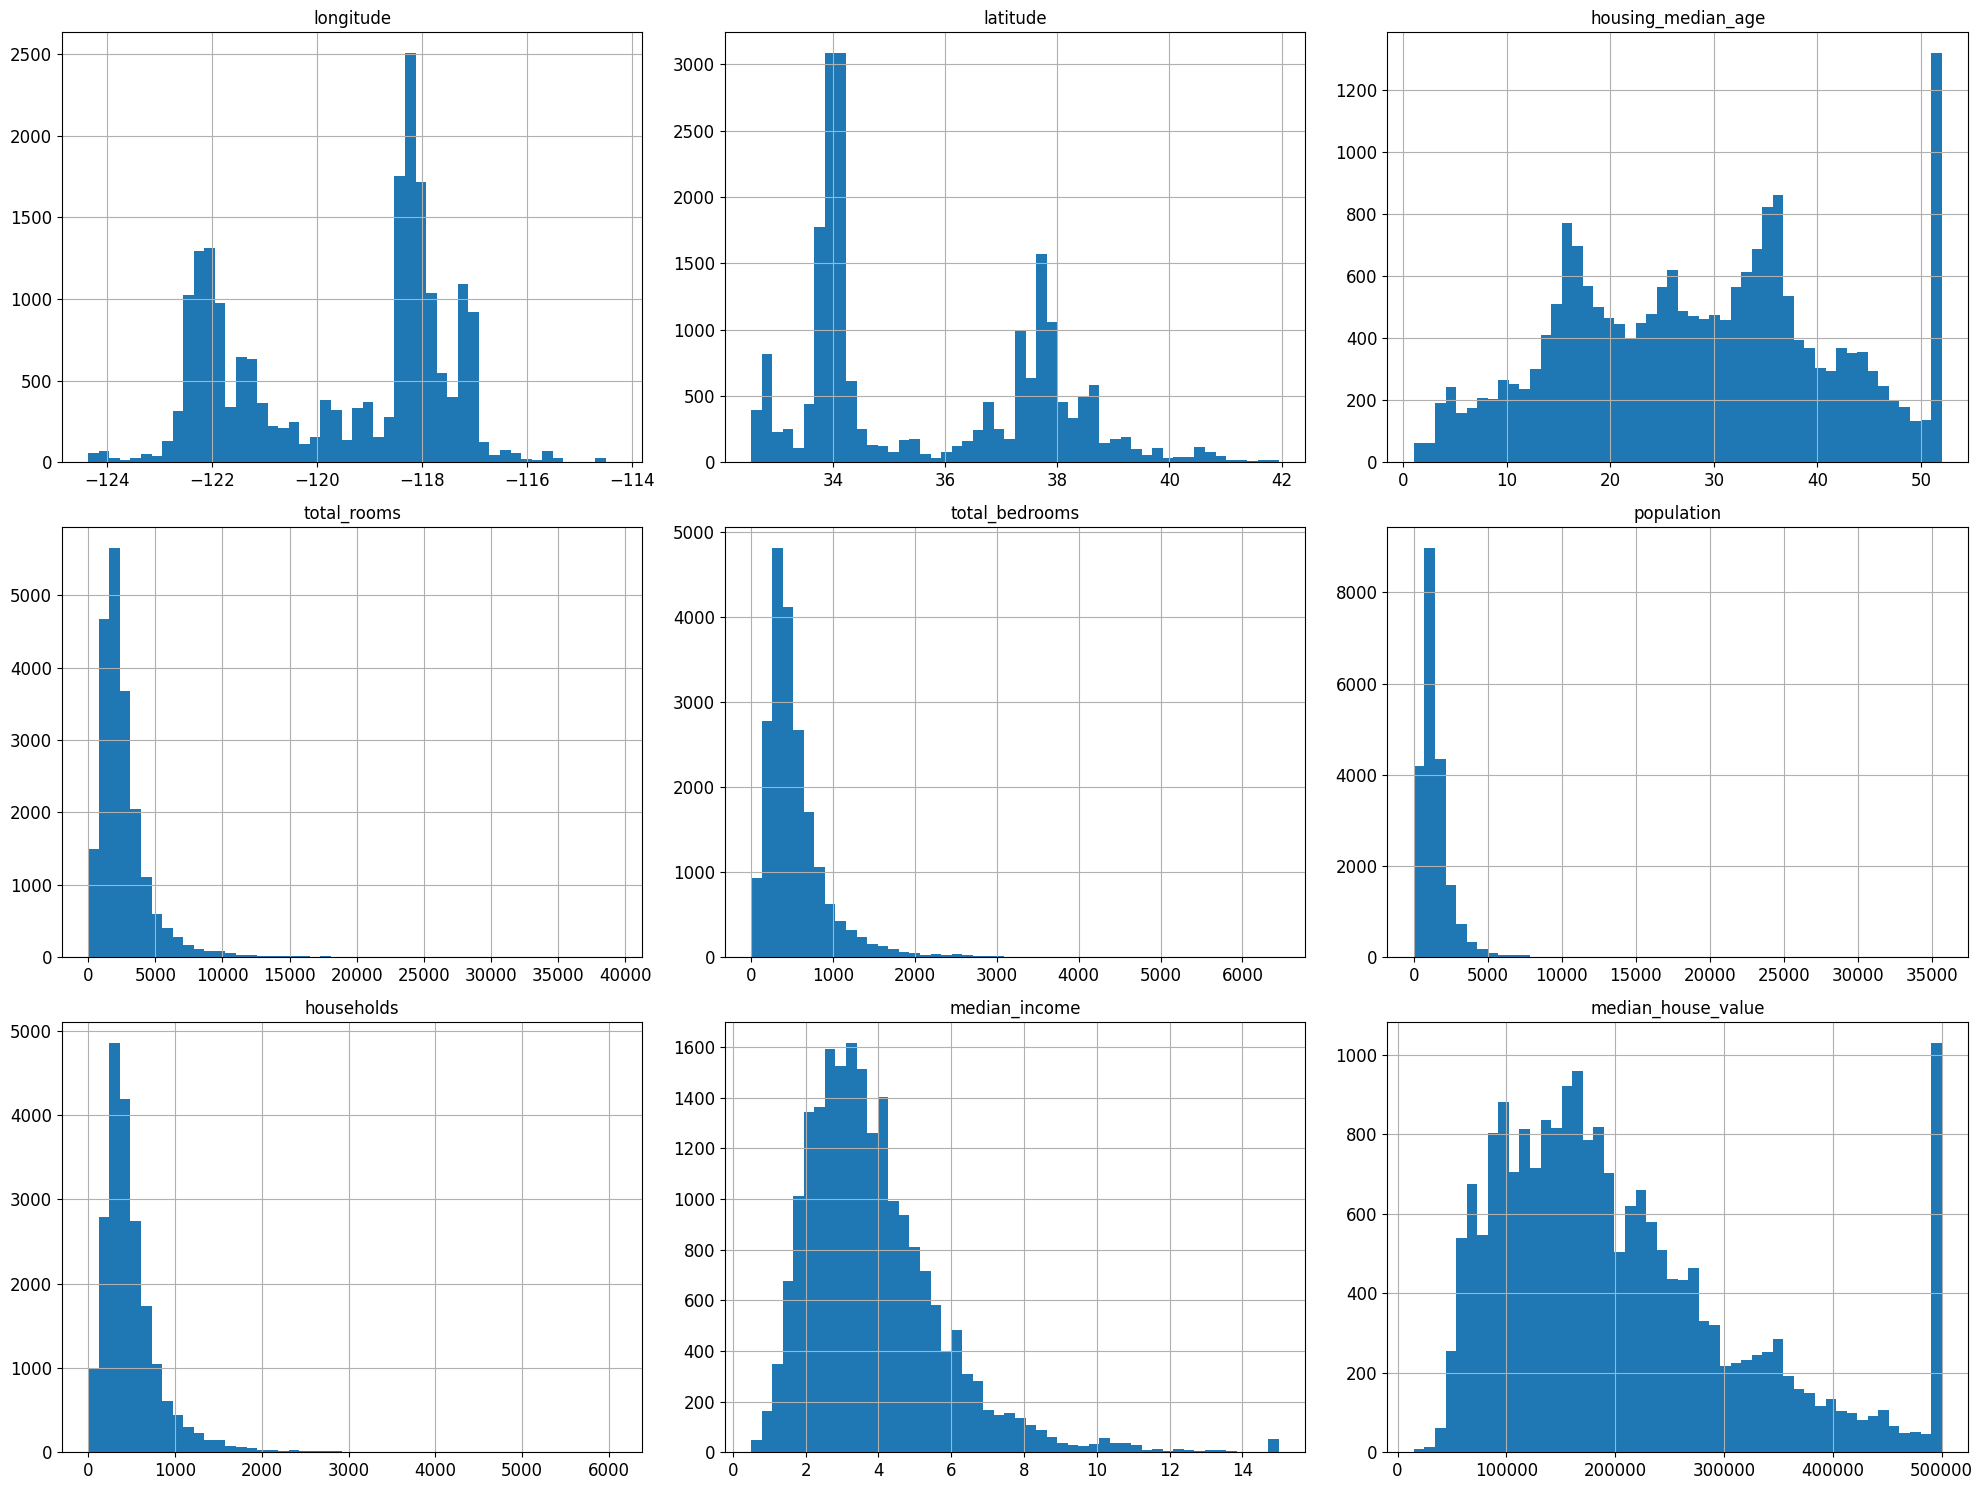

In [10]:
# shows the data in histograms
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()
# median_income is not in US Dollar, median_houe_value and housing_median_age are capped
# many features are shifted gaussian bells

# Create test data

<AxesSubplot:>

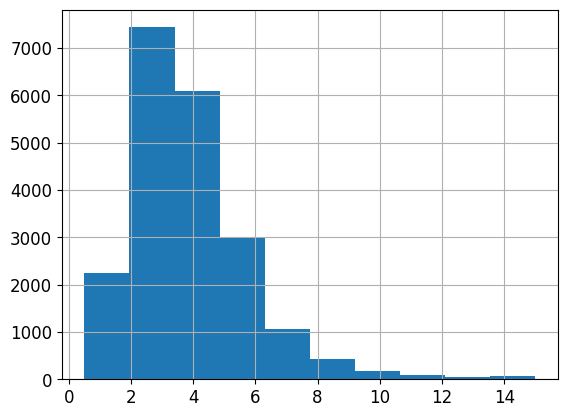

In [11]:
housing["median_income"].hist()

In [12]:
# create bins to get representitive test data
# splits into 5 labels, all between o and 1,5 go into the first one etc.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [13]:
#Counts how often each value/label (1-5) is present
housing["income_cat"].value_counts()



3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

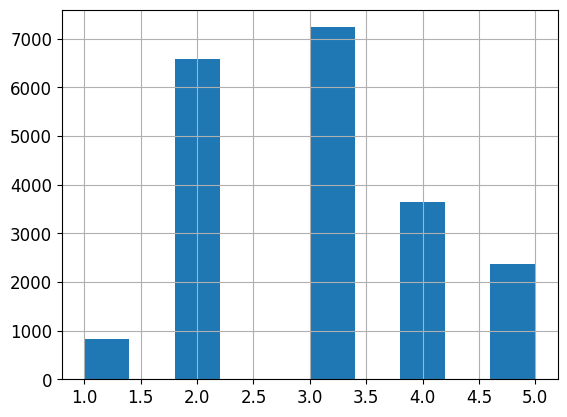

In [14]:
#Shows the data from before as histogramm
housing["income_cat"].hist()



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
# defnes the object split as a StratifiedShuffleSplit with 1 split ratio of 0.2 and a random state
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# using split on housing based on the categories generated berfore
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
housing["income_cat"].value_counts() / len(housing)


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [17]:
# Drop income cat feature because it was only needed for the test data definition
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


# Data visualization



In [18]:
# Copy the training test so the original data doesnt get altered
housing = strat_train_set.copy()


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

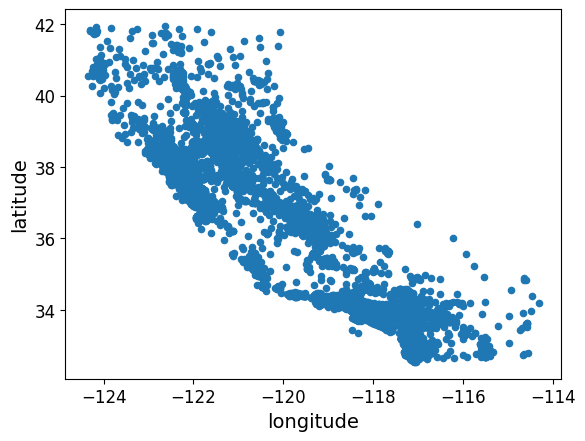

In [19]:
# Plot the location of the districts
housing.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

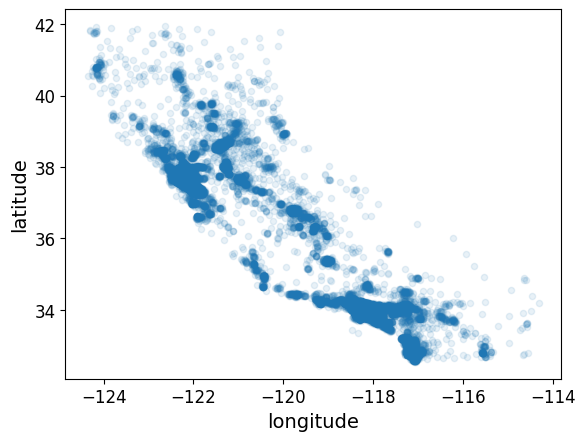

In [20]:
# alpha to 0.1 to see the clusters better
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

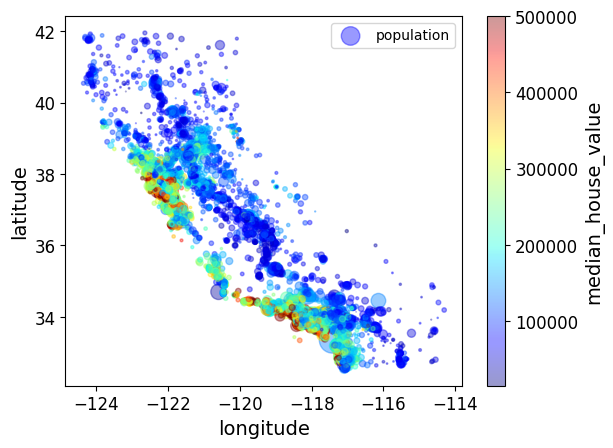

In [21]:
# add population of the districts and house value to better understand the data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# it shows that there are clusters where the house prices are higher
# so it depends on location

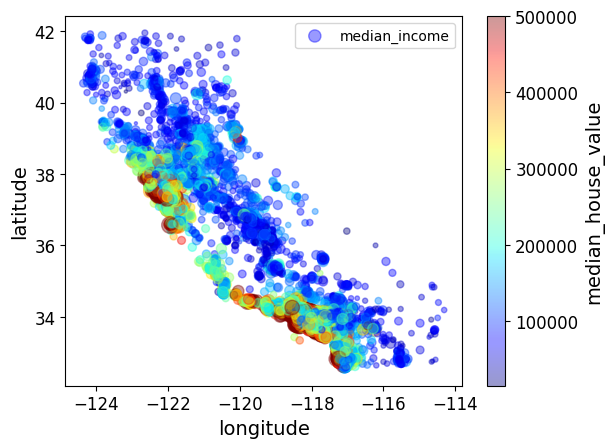

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["median_income"]*10, label="median_income",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# shows connection of house prices to median income

# Looking for Correlations

In [23]:
# Creates a correlation matrix of housing
corr_matrix = housing.corr()
# Shows the correlations of the features to meadian_house_value
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

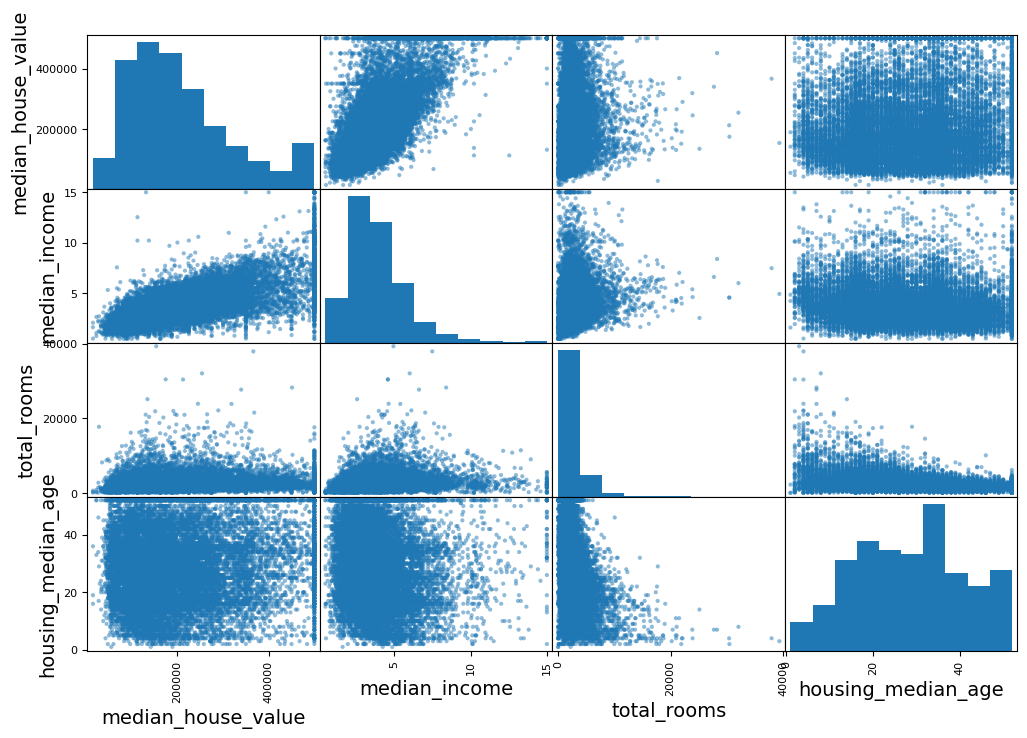

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
# shows correlation matrices of the defined attributes
scatter_matrix(housing[attributes], figsize=(12, 8))



<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

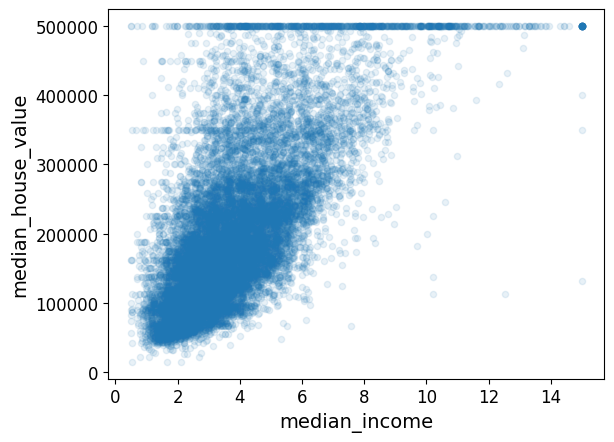

In [25]:
# shows the most promising correlation
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [26]:
# calculates a few features that could be useful
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]


In [27]:
# Calculates correlation again to find out if the new attributes are useful
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_household     -0.043349
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare Data for Machine Learning Algorithms


In [28]:
# Removes the label from the traindata, housing is now the Training set
housing = strat_train_set.drop("median_house_value", axis=1)
# housing_labels now contains the labels
housing_labels = strat_train_set["median_house_value"].copy()


In [29]:
#handles missing data even for new data 
from sklearn.impute import SimpleImputer
# Sets the imputer strategy to median
imputer = SimpleImputer(strategy="median")
#drops ocean_proximity because it is an categorial value
housing_num = housing.drop("ocean_proximity", axis=1)
# Fits imputer on the numeric trainings data
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [30]:
# See the calculated medians for each feature
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
# Transforms the numeric trainings data/ 
# exchanges all the nan values with the corresponding median value
X = imputer.transform(housing_num)
# transforms it back into a df
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


In [77]:
from sklearn.preprocessing import OneHotEncoder
# creates a table of the category value(s)
housing_cat = housing["ocean_proximity"]
print(housing_cat)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
            ...    
15174     <1H OCEAN
12661        INLAND
19263     <1H OCEAN
19140     <1H OCEAN
19773        INLAND
Name: ocean_proximity, Length: 16512, dtype: object


In [42]:
from sklearn.preprocessing import LabelBinarizer
# creates object encoder with Label Binarizer
encoder = LabelBinarizer()
# uses encoder to transform the categorial values into 1hot encoded matrix
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
# data will be a numpy array so to make clear with coulmn is used, names are added
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
# This class creates additional features that were testes before
- bedrooms per room is here a hyperparameter
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# creates a pipeline for all numeric data that includes handling nan values,
# adding new feautures and scaling the values
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
# applies the pipeline to housing_num (raw trainingsdata without categorial features)
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [45]:
housing_num_tr


array([[-0.94135046,  1.34743822,  0.02756357, ..., -0.8936472 ,
         0.01739526,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  1.292168  ,
         0.56925554, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.52543365,
        -0.01802432, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.36547546,
        -0.5092404 , -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.16826095,
         0.32814891, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.390569  ,
         0.01407228,  0.00657083]])

In [80]:
from sklearn.compose import ColumnTransformer

# saves the feature names of the ddataframe housing_num in num_attributes
num_attribs = list(housing_num)
# Only one categorial feature. It is saved in cat-attribs
cat_attribs = ["ocean_proximity"]

# full_pipeline combines the data transformation of num und cat features
full_pipeline = ColumnTransformer([
    # executes num_pipeline on all num_attribs
        ("num", num_pipeline, num_attribs),
    # executes 1hot encoder on cat_attribs. Only one action so no pipeline needed
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# applies the full pipeline to housing(dataframe with all trainingsdata)
housing_prepared = full_pipeline.fit_transform(housing)


In [47]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
housing_prepared.shape

(16512, 15)

In [49]:
df=pd.DataFrame(housing_prepared)
print(df.head())

         0         1         2         3         4         5         6   \
0 -0.941350  1.347438  0.027564  0.584777  0.640371  0.732602  0.556286   
1  1.171782 -1.192440 -1.722018  1.261467  0.781561  0.533612  0.721318   
2  0.267581 -0.125972  1.220460 -0.469773 -0.545138 -0.674675 -0.524407   
3  1.221738 -1.351474 -0.370069 -0.348652 -0.036367 -0.467617 -0.037297   
4  0.437431 -0.635818 -0.131489  0.427179  0.272790  0.374060  0.220898   

         7         8         9    10   11   12   13   14  
0 -0.893647  0.017395  0.006223  0.0  1.0  0.0  0.0  0.0  
1  1.292168  0.569256 -0.040811  0.0  0.0  0.0  0.0  1.0  
2 -0.525434 -0.018024 -0.075371  0.0  1.0  0.0  0.0  0.0  
3 -0.865929 -0.595140 -0.106803  0.0  0.0  0.0  0.0  1.0  
4  0.325752  0.251241  0.006109  1.0  0.0  0.0  0.0  0.0  


In [50]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [85]:
# takes the first 5 instances from housing
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
# predicts the labels with the trainingsdata
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN  
Predictions:	 [ 88308.5135735  304174.12243205 154135.1578518  183826.73869117
 247307.37672157]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 2

In [52]:
>>> from sklearn.metrics import mean_squared_error
# predicts all instances of the trainingsdata
>>> housing_predictions = lin_reg.predict(housing_prepared)
# calculates the mse
>>> lin_mse = mean_squared_error(housing_labels, housing_predictions)
# calculates the rmse
>>> lin_rmse = np.sqrt(lin_mse)
>>> lin_rmse

68911.35422344579

In [53]:
from sklearn.tree import DecisionTreeRegressor
# trains a decision tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [54]:
>>> housing_predictions = tree_reg.predict(housing_prepared)
# calculates rmse
>>> tree_mse = mean_squared_error(housing_labels, housing_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse

0.0

In [55]:
from sklearn.model_selection import cross_val_score
# executes a cross validation with tree model and 10 different validation sets
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
# calculates rmse from cross validation scores
rmse_scores = np.sqrt(-scores)


In [56]:
# defines a function to show importand scores of performance
>>> def display_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())

>>> display_scores(rmse_scores)


Scores: [71363.11253149 68248.34914529 69277.705614   73254.25865398
 68256.8258564  77529.34237872 71602.23730328 70972.05832943
 68641.755356   70393.4555441 ]
Mean: 70953.9100712695
Standard deviation: 2686.6367658752474


In [57]:
# cross validation for the linear regression model
>>> lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
        scoring="neg_mean_squared_error", cv=10)
>>> lin_rmse_scores = np.sqrt(-lin_scores)
>>> display_scores(lin_rmse_scores)

Scores: [72327.16076767 64517.26490514 68064.68293242 69115.0013636
 67146.11690224 73027.74105799 70586.20149172 69341.53755437
 66928.91520262 70506.05866694]
Mean: 69156.06808447084
Standard deviation: 2462.909908120935


In [58]:
>>> from sklearn.ensemble import RandomForestRegressor
# trains a random forest model
>>> forest_reg = RandomForestRegressor()
>>> forest_reg.fit(housing_prepared, housing_labels)
# predicts the trainingsdata
>>> housing_predictions = forest_reg.predict(housing_prepared)
# show rmse
>>> forest_mse = mean_squared_error(housing_labels, housing_predictions)
>>> forest_rmse = np.sqrt(forest_mse)
forest_rmse

18695.881608719446

# Fine tune random forest model

In [59]:
from sklearn.model_selection import GridSearchCV
# defines the hyperparameter sets that should be tested
param_grid = [
 {'n_estimators': [30], 'max_features': [6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [4]},
 ]
#applies grid search to a random forest regressor
forest_reg = RandomForestRegressor()
# it uses for each set of hyperparameter a cross validation with 4 validation sets
grid_search = GridSearchCV(forest_reg, param_grid, cv=4,
 scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [6, 8], 'n_estimators': [30]},
                         {'bootstrap': [False], 'max_features': [4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [60]:
# shows the hyperparameter that had the best result
>>> grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [61]:
# name of the best performed model
>>> grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [62]:
# shows all results
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50049.38230091629 {'max_features': 6, 'n_estimators': 30}
50743.72653244743 {'max_features': 8, 'n_estimators': 30}
58887.97020065254 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51673.55918017436 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [63]:
# shows the feature importance for the best model
>>> feature_importances = grid_search.best_estimator_.feature_importances_
>>> feature_importances

array([8.98343592e-02, 7.65570921e-02, 4.33880550e-02, 1.99959357e-02,
       1.82535055e-02, 1.93170042e-02, 1.73777069e-02, 3.30965192e-01,
       8.50001709e-02, 1.10639466e-01, 1.89798554e-02, 1.63936669e-01,
       3.55905769e-05, 2.41924537e-03, 3.30015090e-03])

In [64]:
# list of all feature names
>>> extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
>>> cat_one_hot_attribs = list(encoder.classes_)
>>> attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# adding feature names to feature importance to showcase the most important features
>>> sorted(zip(feature_importances, attributes), reverse=True)


[(0.3309651924991356, 'median_income'),
 (0.16393666942201524, '<1H OCEAN'),
 (0.1106394662914892, 'pop_per_hhold'),
 (0.08983435924229433, 'longitude'),
 (0.08500017091134583, 'rooms_per_hhold'),
 (0.0765570921377273, 'latitude'),
 (0.04338805496677975, 'housing_median_age'),
 (0.01999593567184538, 'total_rooms'),
 (0.01931700418591597, 'population'),
 (0.018979855365476805, 'bedrooms_per_room'),
 (0.018253505515700715, 'total_bedrooms'),
 (0.017377706944398476, 'households'),
 (0.0033001509016570246, 'NEAR BAY'),
 (0.002419245367289941, 'ISLAND'),
 (3.559057692849952e-05, 'INLAND')]

In [66]:

final_model = grid_search.best_estimator_
# defines the attributes and labels of the test data in different variables
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
# send the trainings features through the complete transform pipeline
X_test_prepared = full_pipeline.transform(X_test)
# predicts the labels for the test data
final_predictions = final_model.predict(X_test_prepared)
# calculates the emse
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47073.019504516225


In [67]:
# Save the model
import joblib
joblib.dump(final_model, "my_model.pkl")
# and later...
#my_model_loaded = joblib.load("my_model.pkl")

['my_model.pkl']

# Exercise 1: Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


# defines parameter for grid search
param_grid = [
        {'kernel': ['linear'], 'C': [10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [ 1000.0],
         'gamma': [0.01, 0.03]},
    ]

# grid search on svr model with cross validation
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........................C=10000.0, kernel=linear; total time=  22.1s
[CV] END ...........................C=10000.0, kernel=linear; total time=  22.7s
[CV] END ...........................C=10000.0, kernel=linear; total time=  21.1s
[CV] END ...........................C=10000.0, kernel=linear; total time=  21.3s
[CV] END ...........................C=10000.0, kernel=linear; total time=  22.6s
[CV] END ...........................C=30000.0, kernel=linear; total time=  32.3s
[CV] END ...........................C=30000.0, kernel=linear; total time=  32.2s
[CV] END ...........................C=30000.0, kernel=linear; total time=  31.4s
[CV] END ...........................C=30000.0, kernel=linear; total time=  30.4s
[CV] END ...........................C=30000.0, kernel=linear; total time=  34.2s
[CV] END ...................C=1000.0, gamma=0.01, kernel=rbf; total time=  31.0s
[CV] END ...................C=1000.0, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10000.0, 30000.0], 'kernel': ['linear']},
                         {'C': [1000.0], 'gamma': [0.01, 0.03],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [73]:
# print the rmse of the best hyperparameter model
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse


70355.59720995504

In [74]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

# Exercise 2: Try replacing GridSearchCV with RandomizedSearchCV

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


# defines hyperparameter that should be tested
param_distribs = {
    # random kernel
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
# applies random search
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=5, cv=2, scoring='neg_mean_squared_error',
                                verbose=2, random_state=36)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END C=16408.117675822963, gamma=0.9203344275280259, kernel=rbf; total time=  23.8s
[CV] END C=16408.117675822963, gamma=0.9203344275280259, kernel=rbf; total time=  24.5s
[CV] END C=39816.701643777466, gamma=1.9880919257490541, kernel=rbf; total time=  28.7s
[CV] END C=39816.701643777466, gamma=1.9880919257490541, kernel=rbf; total time=  29.6s
[CV] END C=567.3987592155264, gamma=0.2064791916263074, kernel=rbf; total time=  23.6s
[CV] END C=567.3987592155264, gamma=0.2064791916263074, kernel=rbf; total time=  23.9s
[CV] END C=884.3201712103032, gamma=1.6364670345320562, kernel=rbf; total time=  23.9s
[CV] END C=884.3201712103032, gamma=1.6364670345320562, kernel=rbf; total time=  23.8s
[CV] END C=123015.06158508737, gamma=2.346727632115172, kernel=linear; total time=  26.4s
[CV] END C=123015.06158508737, gamma=2.346727632115172, kernel=linear; total time=  30.9s


RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D7F52CAC80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D79908A950>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=36, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70769.47804518526

In [88]:
rnd_search.best_params_

{'C': 123015.06158508737, 'gamma': 2.346727632115172, 'kernel': 'linear'}

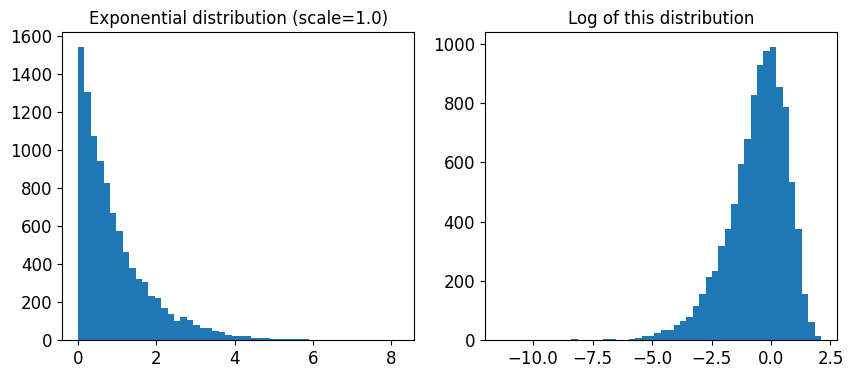

In [89]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

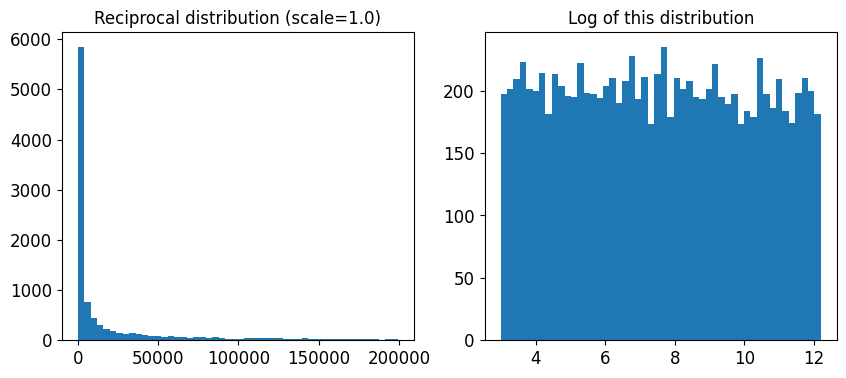

In [90]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

# Exercise 3: Try adding a transformer in the preparation pipeline to select only the most

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin

# function gisves the k top indices
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [92]:
k = 5

In [93]:
# saves the k top features indices
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  8,  9, 11], dtype=int64)

In [94]:
# gets the names of the top k features
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'rooms_per_hhold', 'pop_per_hhold',
       '<1H OCEAN'], dtype='<U18')

In [95]:
# 
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3309651924991356, 'median_income'),
 (0.16393666942201524, '<1H OCEAN'),
 (0.1106394662914892, 'pop_per_hhold'),
 (0.08983435924229433, 'longitude'),
 (0.08500017091134583, 'rooms_per_hhold')]

In [96]:
# this pipeline first applies full_pipeline and afterwardsthe topfeatureselector
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [97]:
# applies the pipeline to housing (full training set without labels)
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [98]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 ,  0.01739526,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  ,  0.56925554, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.01802432, -0.07537122,  1.        ]])

In [99]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 ,  0.01739526,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  ,  0.56925554, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.01802432, -0.07537122,  1.        ]])

# Exercise 4: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [100]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    # takes the best parameter of the rnd_search and trains the model
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [101]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder(add_bedrooms_per_room=False)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_inco...
                 TopFeatureSelector(feature_importances=array([8.98343592e-02, 7.65570921e-02, 4.33880550e-02, 1.99959357e-02,
       1.82535055e-02, 1.93170042e-02, 1.73777069e-02, 3.30965192e-01,
       8.50001709e-02, 1.10639466e-01, 1.89798554e-02, 1.63936669e-01,
       3.55905769e-05, 2.41924537e-03, 3.30015090e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=123015.06158508737, gamma=2.346727632115172,
                     kernel='linear'))])

In [102]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83273.53657269 301497.10382292 106273.05975031 151903.48395821]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


# Exercise 5: Automatically explore some preparation options using GridSearchCV

In [109]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['median', 'most_frequent'],
    'feature_selection__k': list(range(14, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=2,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=median; total time=   0.0s


KeyboardInterrupt: 

In [ ]:
grid_search_prep.best_params_